In [1]:
%matplotlib inline 

In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns

In [3]:
#from kaggle
df1 = pd.read_csv('data/train.csv', index_col=0)
#from uci
#df1 = pd.read_csv('covtype.csv', index_col=0)

In [4]:
from IPython.display import display, HTML
display(HTML(df1.head().to_html(index=False)))

Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
df1.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [6]:
df1.skew()

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

In [7]:
import matplotlib.pyplot as plt

In [8]:
df1.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,...,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,...,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,...,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,...,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,...,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386,...,0.031538,0.045797,0.021415,0.065310,0.030282,0.063302,0.197892,0.120953,0.144786,-0.105662
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144,...,0.018760,-0.050739,0.004457,0.031228,0.013886,0.013207,0.012326,0.024492,-0.017234,-0.010286
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098,...,0.096261,-0.013129,0.034149,0.034638,0.029261,-0.035385,0.104682,-0.058979,-0.008203,-0.098905
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162,...,0.058244,0.024496,0.018298,0.000662,0.004545,-0.028055,0.069262,-0.056383,0.019158,-0.053399
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000,...,0.017055,0.049053,-0.009914,0.004767,-0.009244,0.033256,0.090648,0.047912,0.128467,-0.089389


In [9]:
df1.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

In [10]:
print df1.shape

(15120, 55)


In [11]:
corr = []
tf = df1.corr()

In [12]:
for i in xrange(54):
    for j in xrange(54):
        val = tf.iloc[i,j]
        if (val >= 0.5 and val < 1) or (val < 0 and val <= -0.5):
            corr.append((tf.iloc[i,j],i,j))


In [13]:
len(corr)

20

In [14]:
corr_sort = sorted(corr, key=lambda x:-abs(x[0]))[:10]

In [15]:
corr_sort

[(-0.78365109066317185, 0, 13),
 (-0.78365109066317185, 13, 0),
 (-0.77996474244754399, 6, 8),
 (-0.77996474244754399, 8, 6),
 (0.65214247123573643, 3, 4),
 (0.65214247123573643, 4, 3),
 (0.635022364019874, 1, 8),
 (0.635022364019874, 8, 1),
 (0.61452638724757791, 7, 8),
 (0.61452638724757791, 8, 7)]

In [16]:
def plot_top_10(df,target_attr=None):
    corr = []
    tf = df.corr()
    for i in xrange(54):
        for j in xrange(54):
            val = tf.iloc[i,j]
            if (val >= 0.5 and val < 1) or (val < 0 and val <= -0.5):
                corr.append((tf.iloc[i,j],i,j))
    corr_sort = sorted(corr, key=lambda x:-abs(x[0]))[:10]
    cols = df.columns
    for v,i,j in corr_sort:
        if target_attr is None:
            sns.pairplot(df, size=5, x_vars=cols[i],y_vars=cols[j] )
        else:
            sns.pairplot(df, size=5, hue=target_attr,x_vars=cols[i],y_vars=cols[j] )
        plt.show()

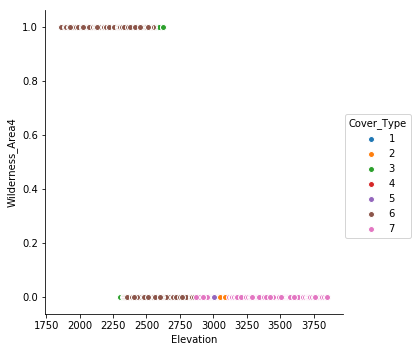

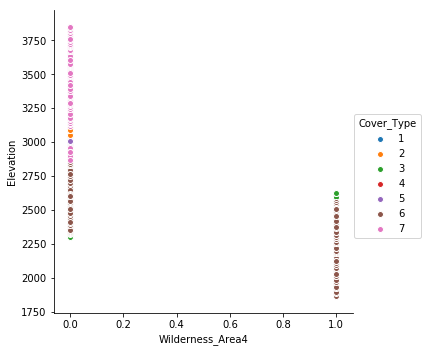

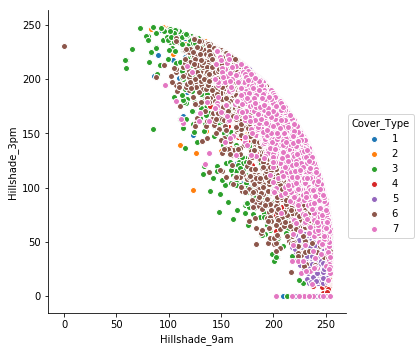

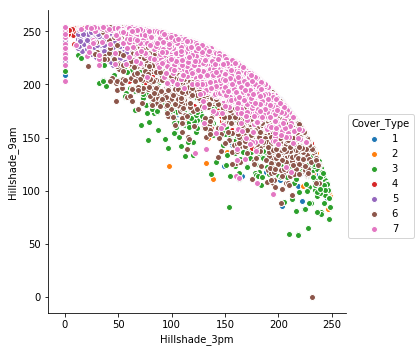

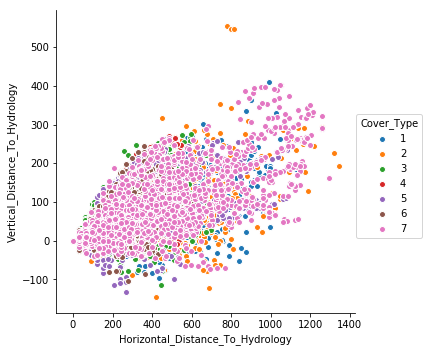

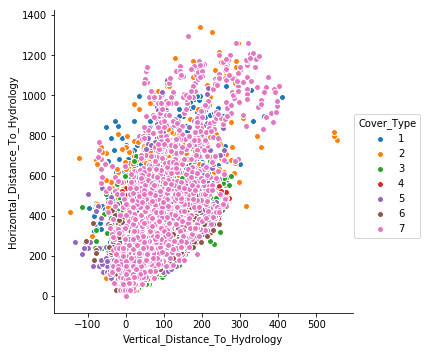

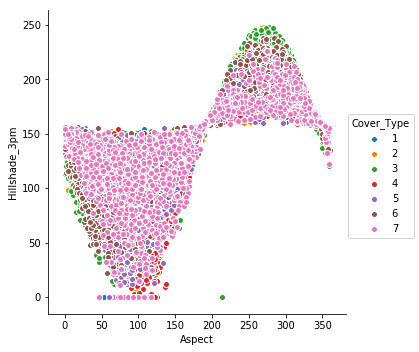

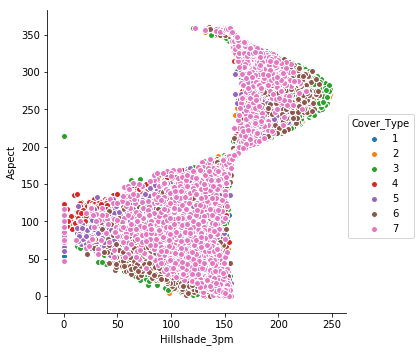

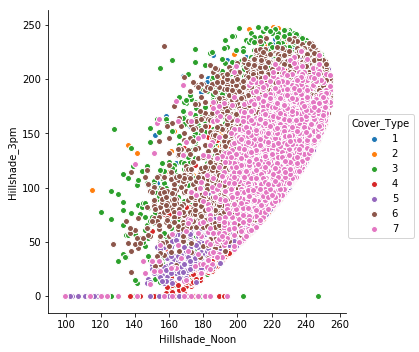

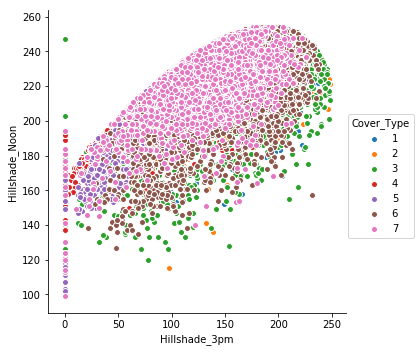

In [17]:
plot_top_10(df1,'Cover_Type')

In [18]:
def show_voilin_plot(x,y,data):
    sns.violinplot(data=data,x=x,y=y)  
    plt.show()

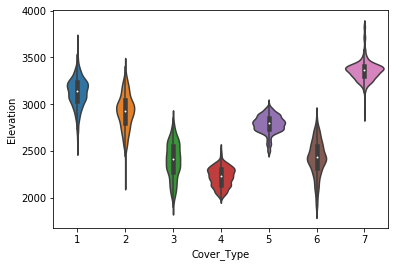

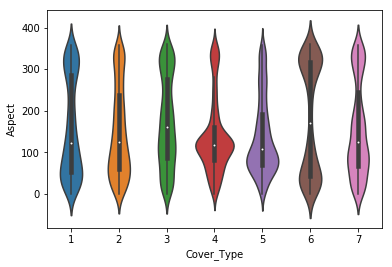

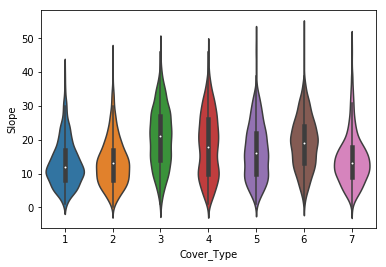

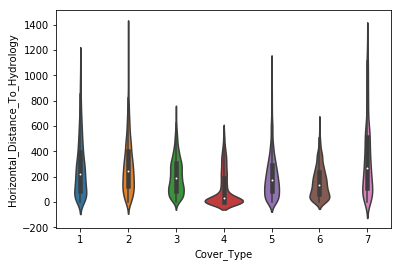

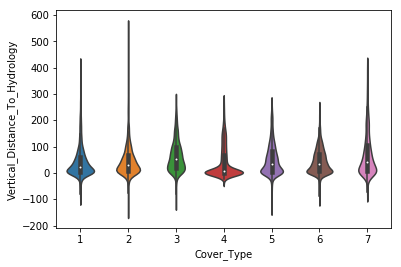

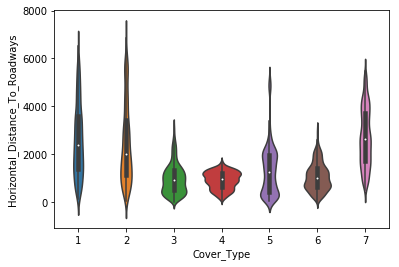

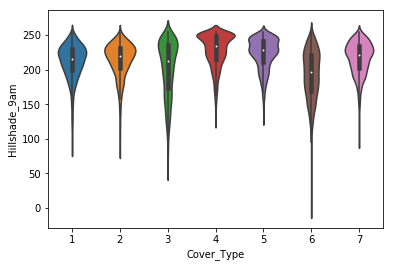

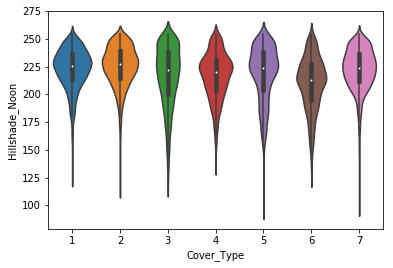

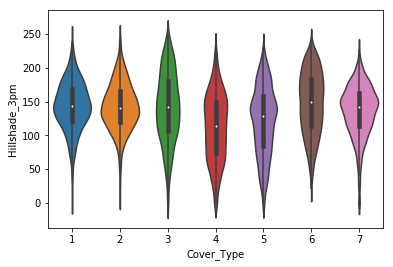

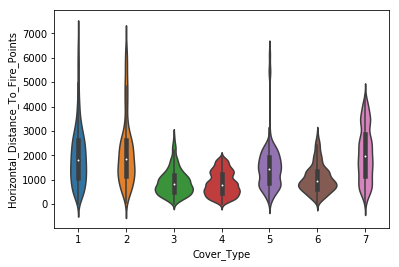

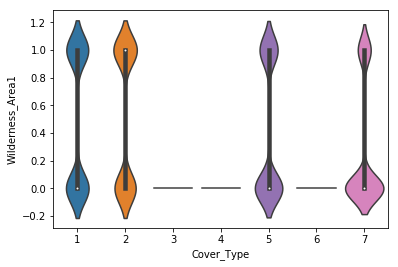

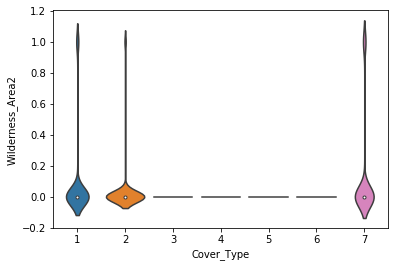

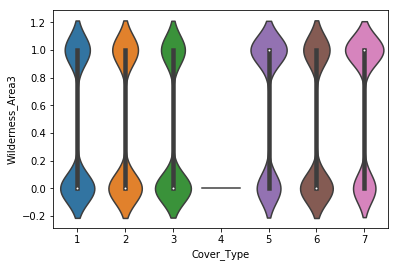

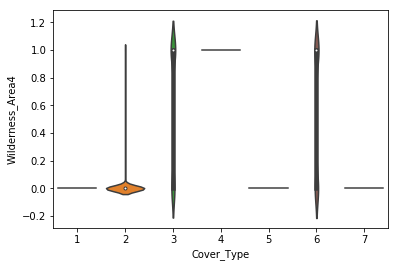

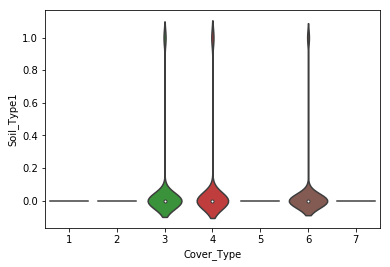

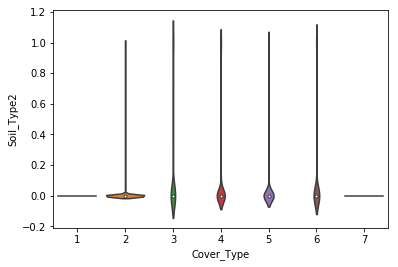

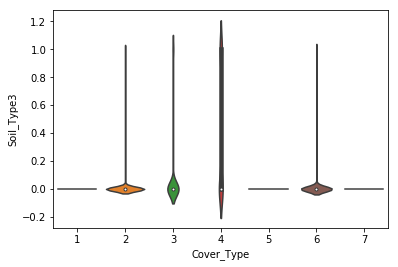

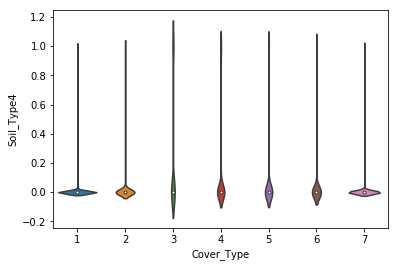

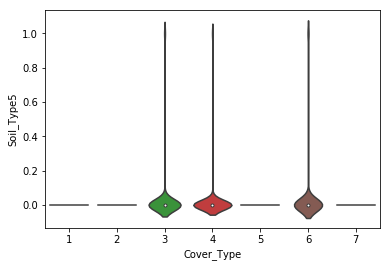

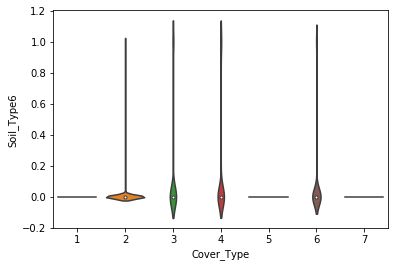

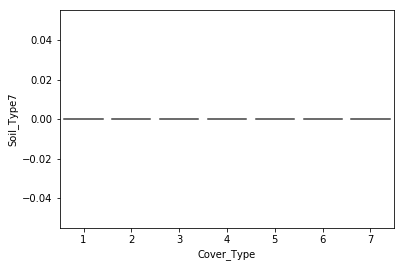

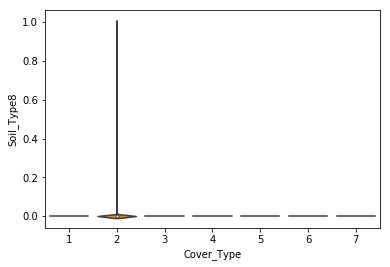

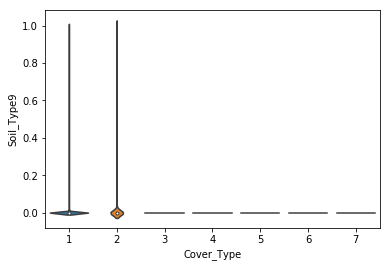

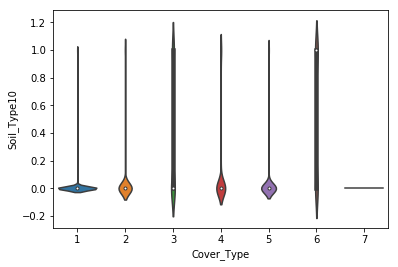

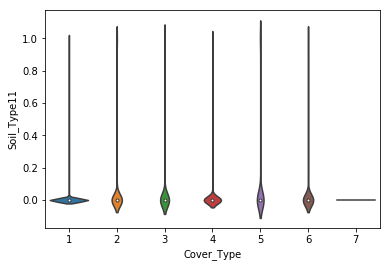

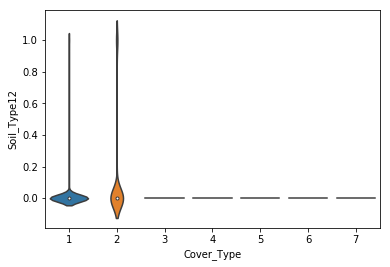

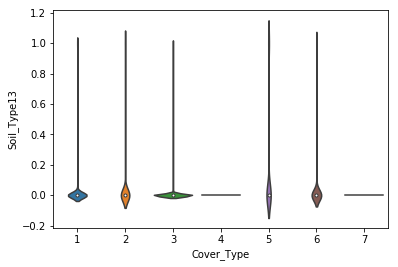

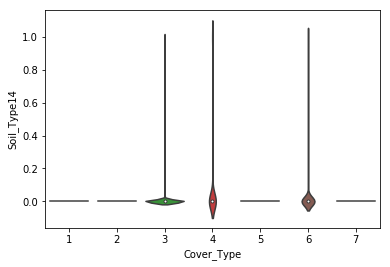

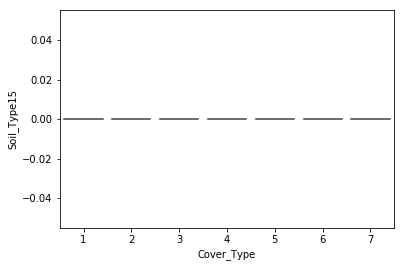

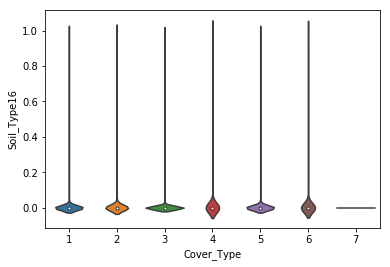

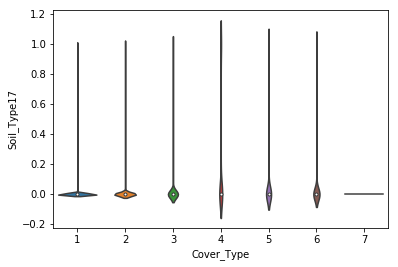

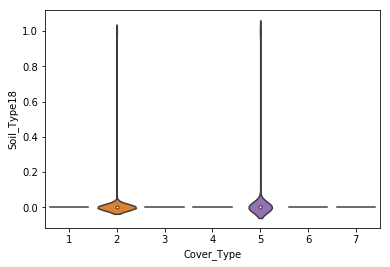

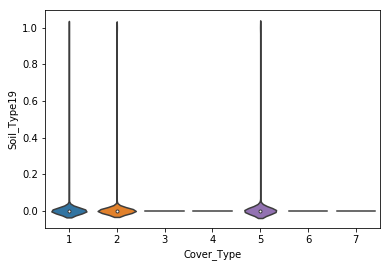

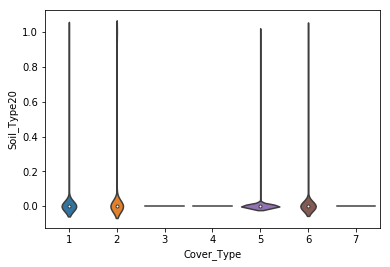

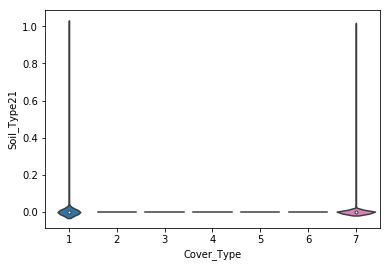

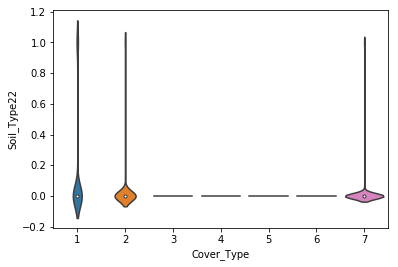

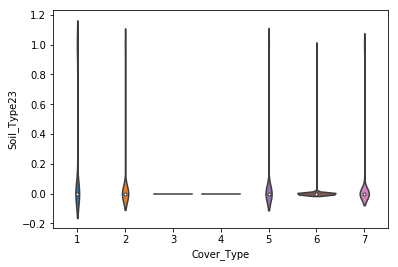

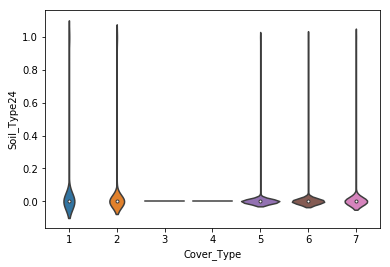

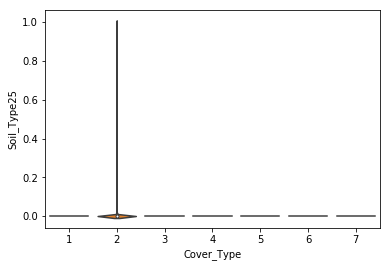

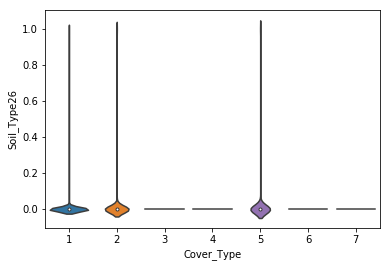

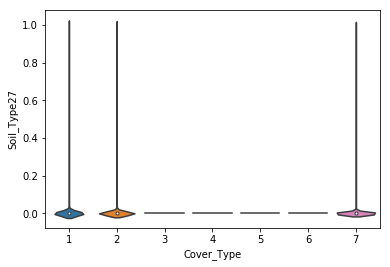

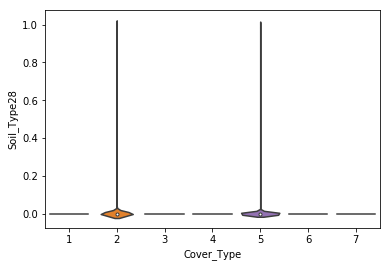

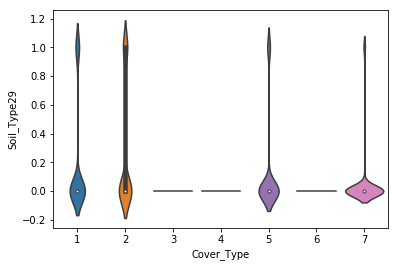

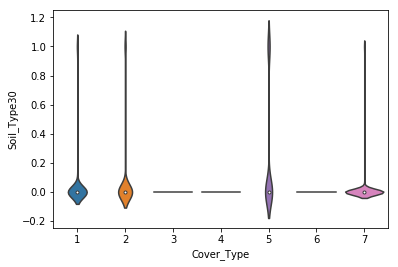

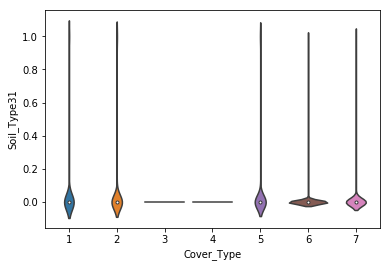

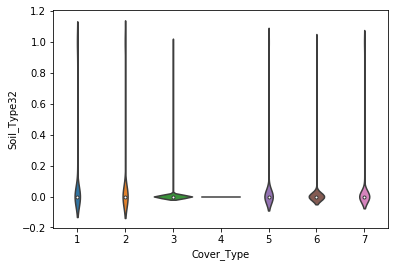

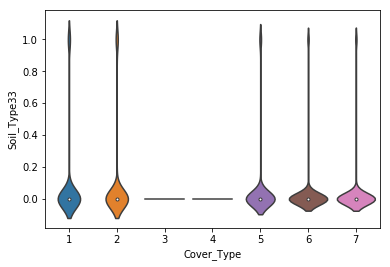

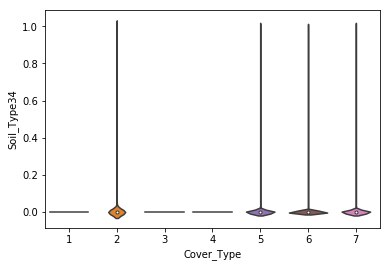

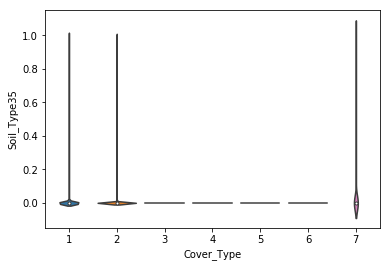

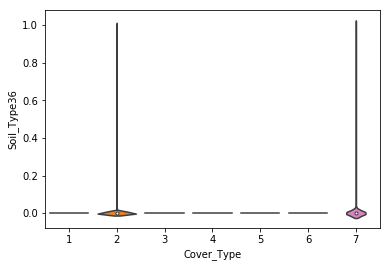

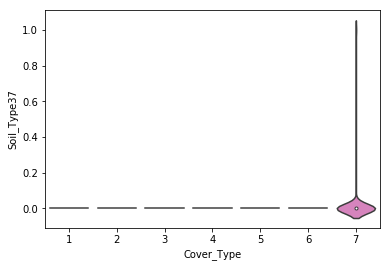

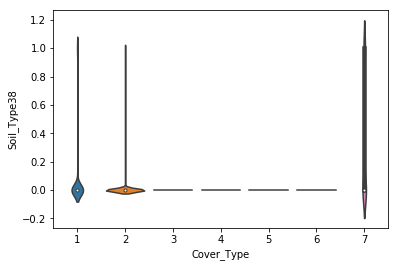

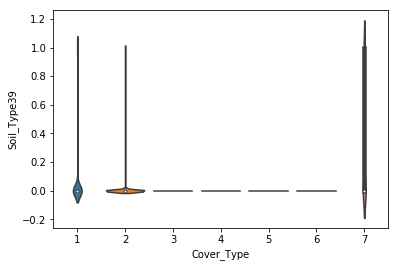

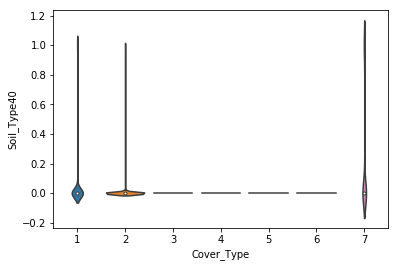

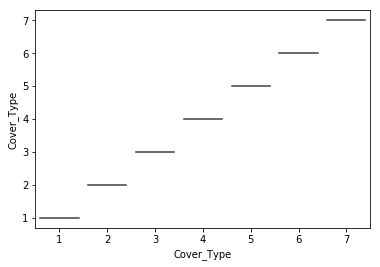

In [19]:
cols = df1.columns
for i in cols:
    show_voilin_plot('Cover_Type', i , df1)

In [20]:
df1["Wild"] = df1.iloc[:,10:14].idxmax(axis=1)
df1['Wild'].head()

Id
1    Wilderness_Area1
2    Wilderness_Area1
3    Wilderness_Area1
4    Wilderness_Area1
5    Wilderness_Area1
Name: Wild, dtype: object

In [21]:
df1['Soil'] = df1.iloc[:,14:54].idxmax(axis=1)
df1['Soil'].head()

Id
1    Soil_Type29
2    Soil_Type29
3    Soil_Type12
4    Soil_Type30
5    Soil_Type29
Name: Soil, dtype: object

In [22]:
df1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wild,Soil
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,5,Wilderness_Area1,Soil_Type29
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,5,Wilderness_Area1,Soil_Type29
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,2,Wilderness_Area1,Soil_Type12
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,2,Wilderness_Area1,Soil_Type30
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,5,Wilderness_Area1,Soil_Type29


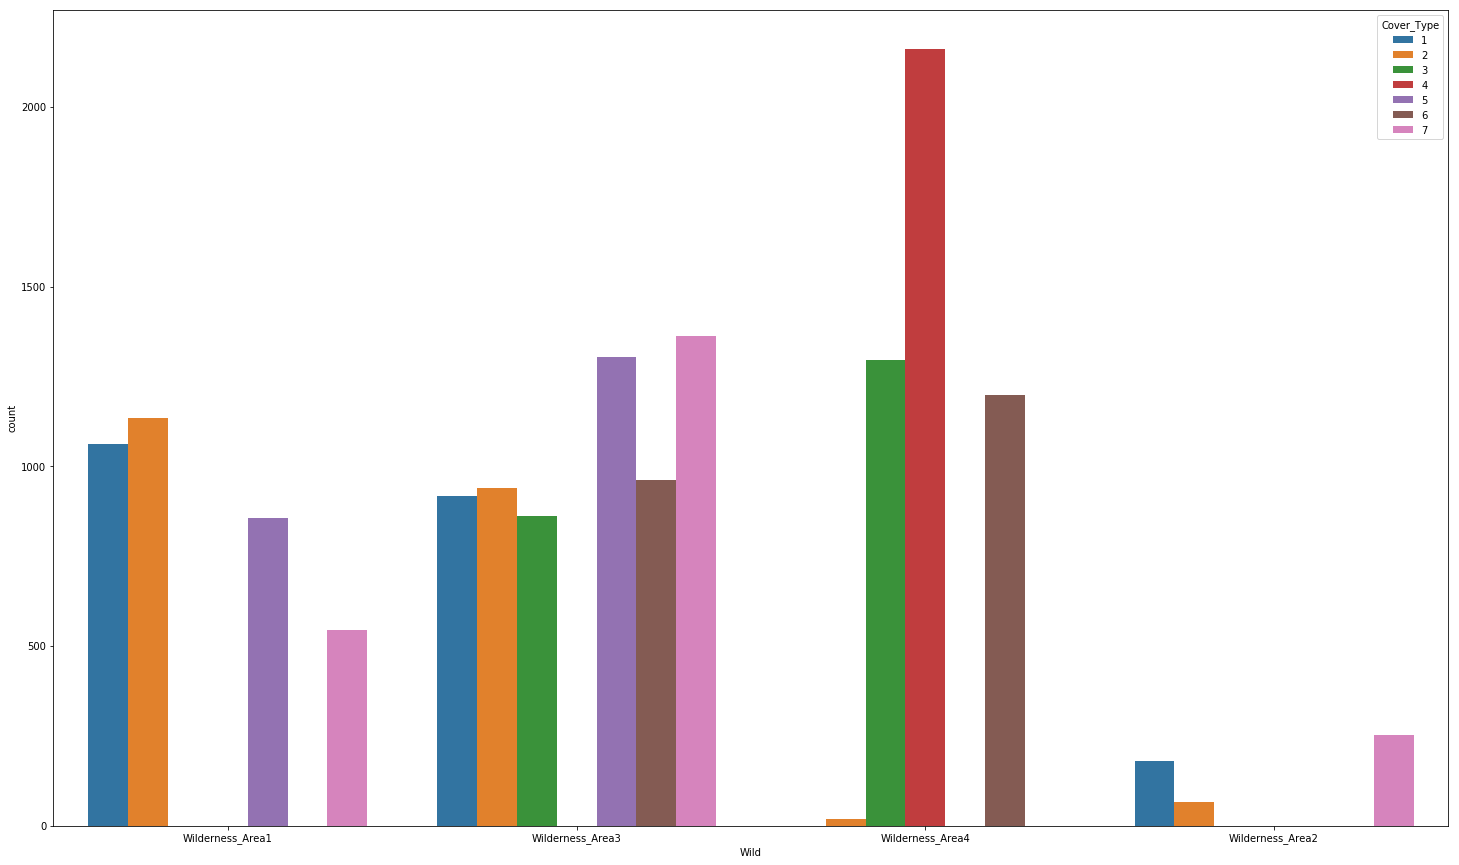

In [23]:
plt.rc("figure", figsize=(25, 15))
sns.countplot(x="Wild", hue="Cover_Type", data=df1)
plt.show()

In [24]:
import warnings
warnings.filterwarnings('ignore')
df3 = df1.copy()
df3['Id'] = [i for i in xrange(df1.shape[0])]
df3['Soil'] = [int(i[-2:]) if i[-2] != 'e' else int(i[-1]) for i in df1['Soil']]
df3['Wild'] = [int(i[-1]) for i in df1['Wild']]
df3['Cover_Type'] = df1['Cover_Type']

In [25]:
df3.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wild,Soil,Id
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,5,1,29,0
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,5,1,29,1
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,2,1,12,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,2,1,30,3
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,5,1,29,4


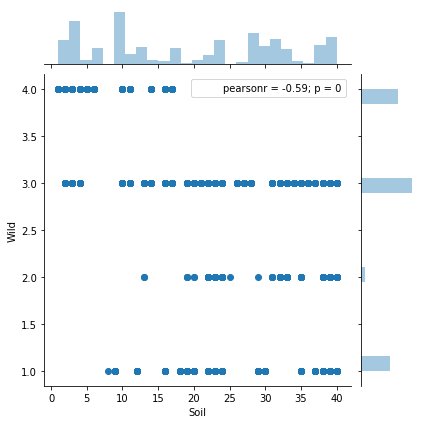

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(25, 15))
sns.jointplot(x='Soil', y='Wild', data=df3)
plt.show()

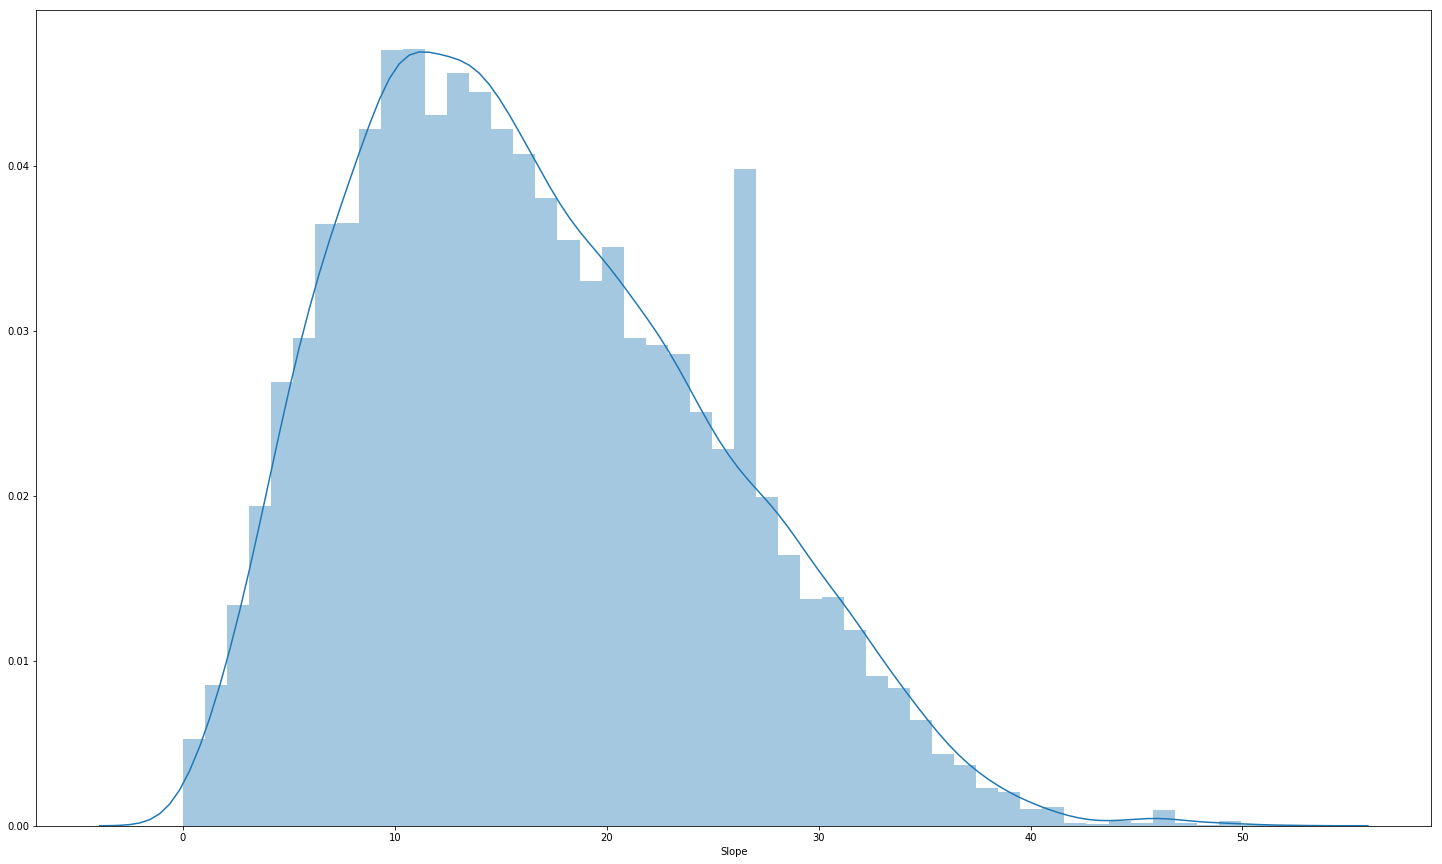

In [27]:
sns.distplot(df3['Slope'])

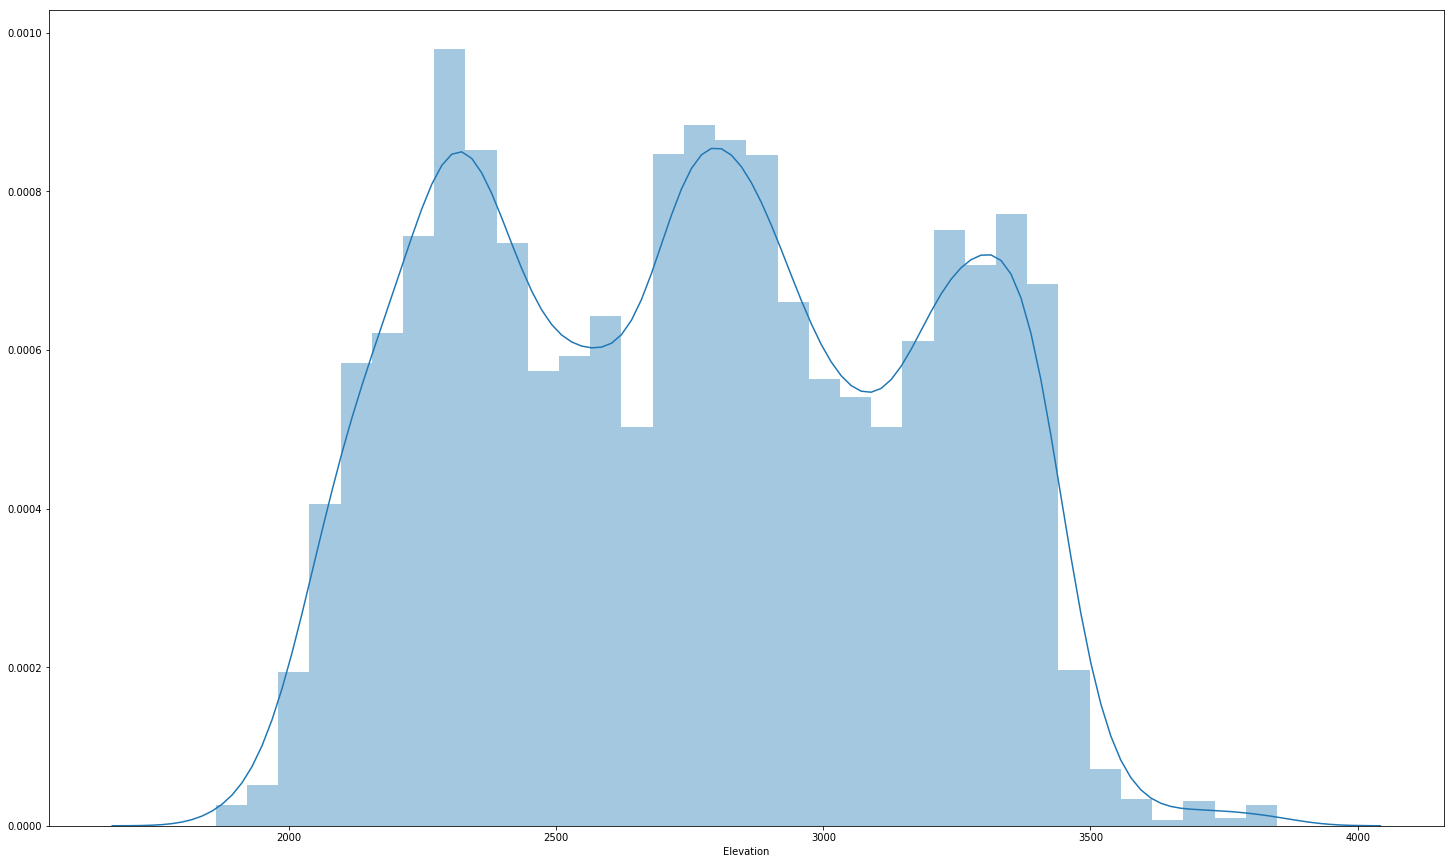

In [28]:
sns.distplot(df3['Elevation'])

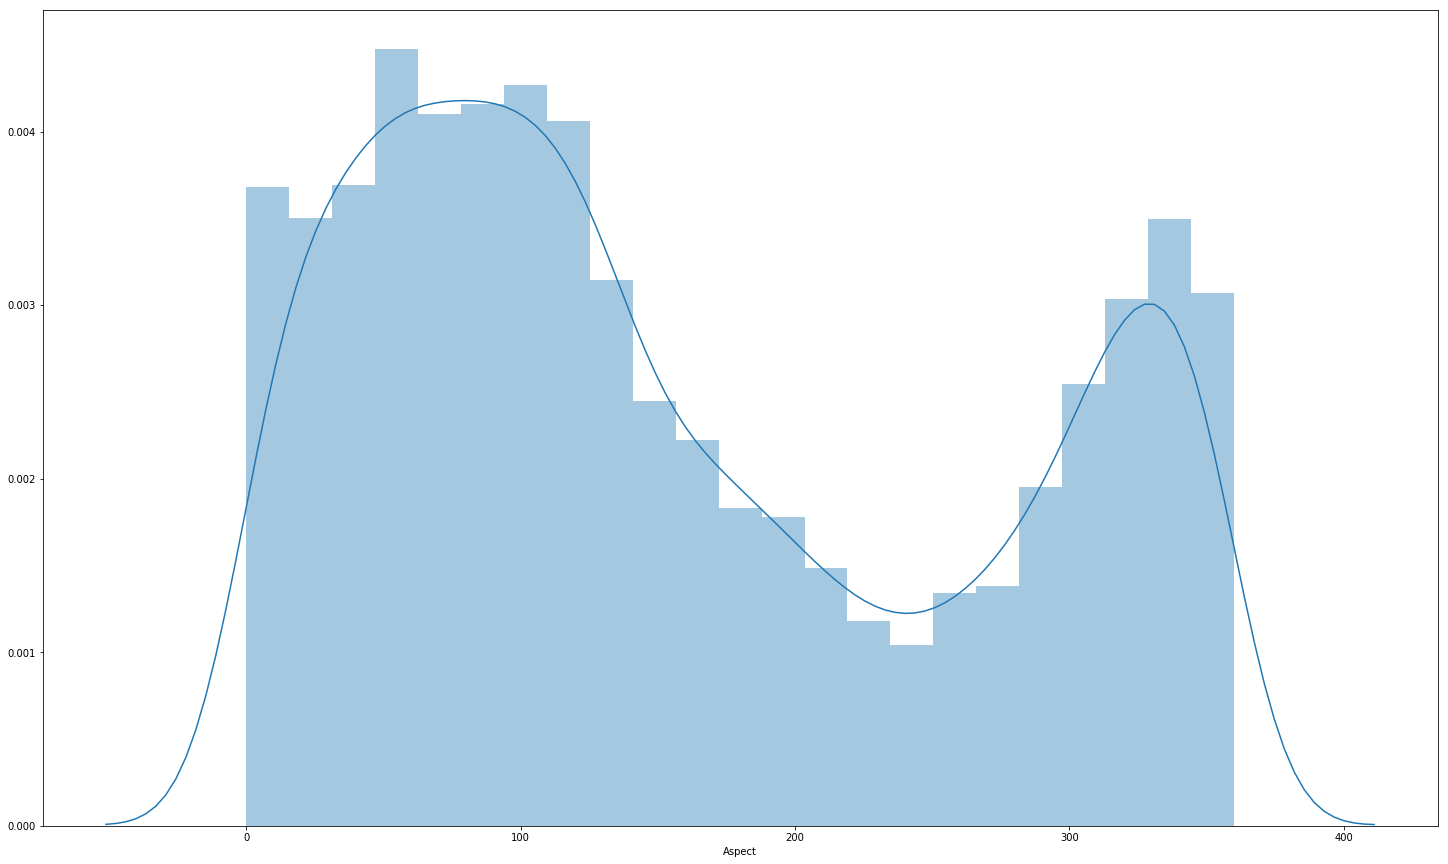

In [29]:
sns.distplot(df3['Aspect'])

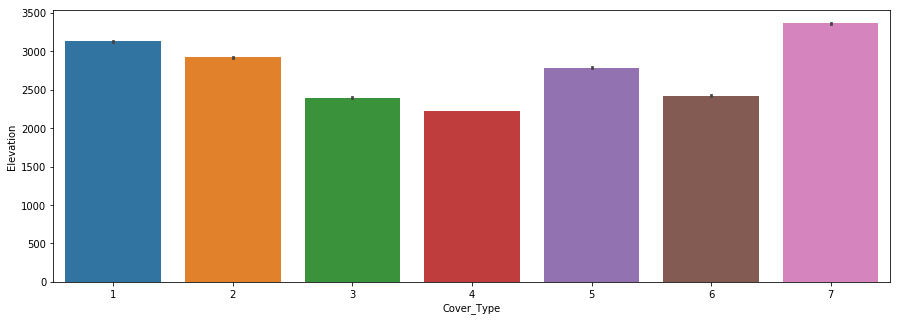

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cover_Type', y='Elevation', data=df3)
plt.show()

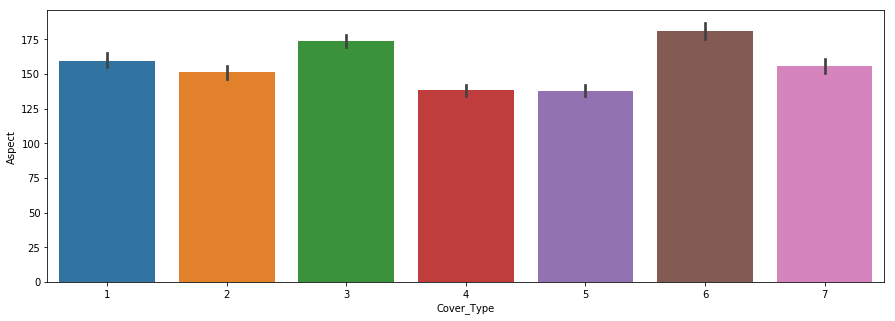

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cover_Type', y='Aspect', data=df3)
plt.show()

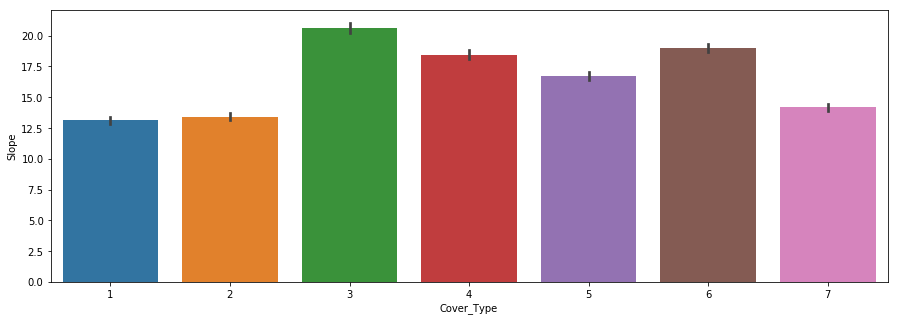

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cover_Type', y='Slope', data=df3)
plt.show()

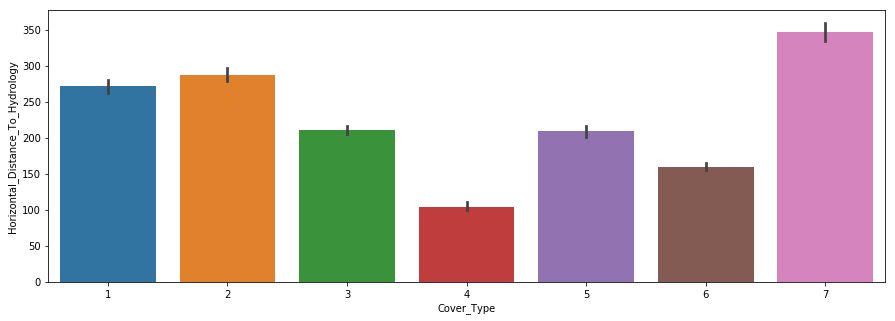

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data=df3)
plt.show()

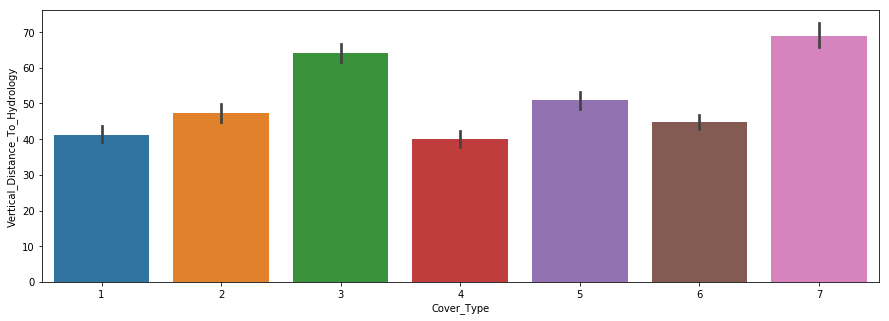

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', data=df3)
plt.show()

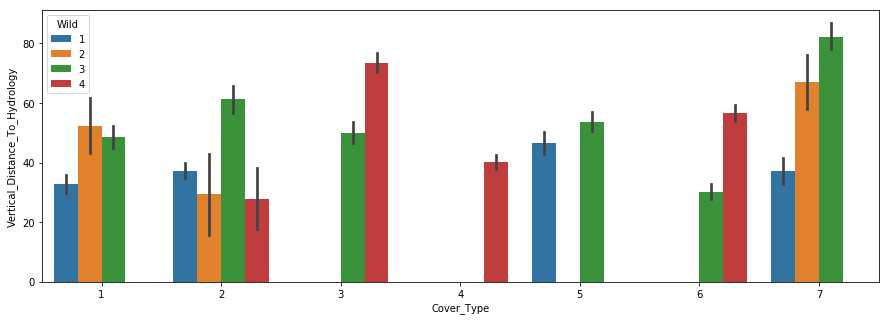

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', hue='Wild', data=df3)
plt.show()

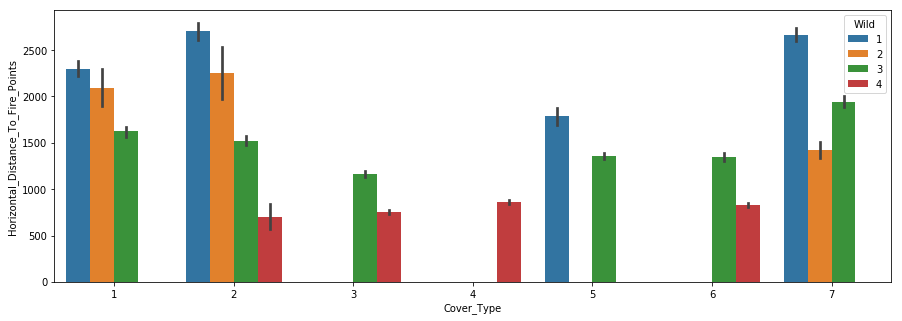

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', hue='Wild', data=df3)
plt.show()

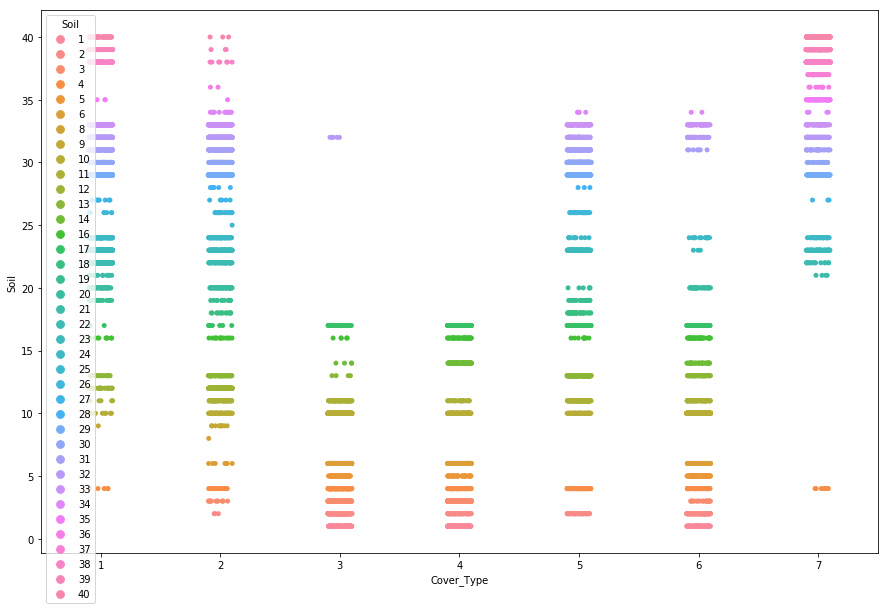

In [37]:
plt.figure(figsize=(15,10))
sns.stripplot(x="Cover_Type", y="Soil", data=df3, hue='Soil',jitter=True);
plt.show()

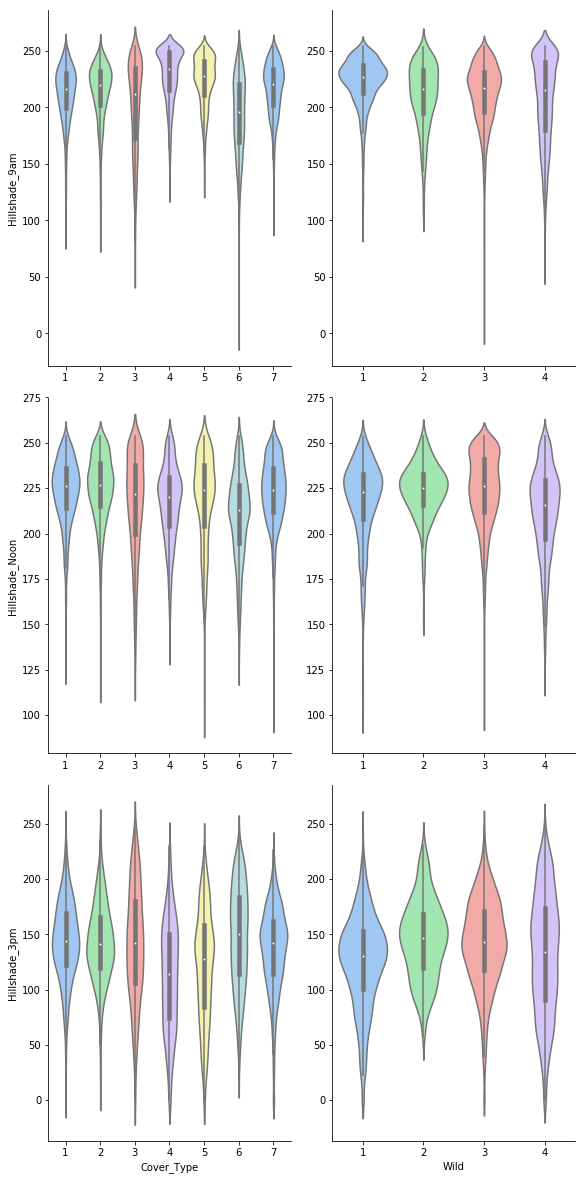

In [38]:
g = sns.PairGrid(df3,
                 x_vars=["Cover_Type","Wild"],
                 y_vars=["Hillshade_9am","Hillshade_Noon","Hillshade_3pm"],
                 aspect=.75, size=5.5)
g.map(sns.violinplot, palette="pastel");

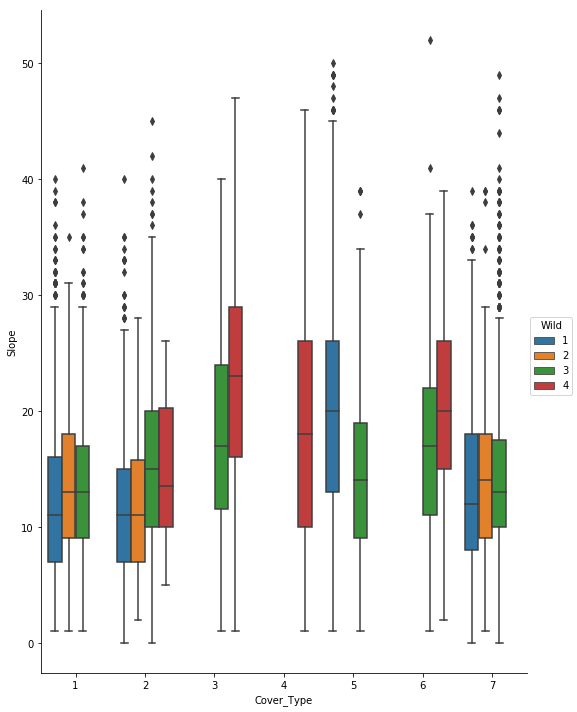

In [39]:
sns.factorplot(x="Cover_Type", y="Slope",data=df3, hue="Wild", kind="box", size=10, aspect=.75);

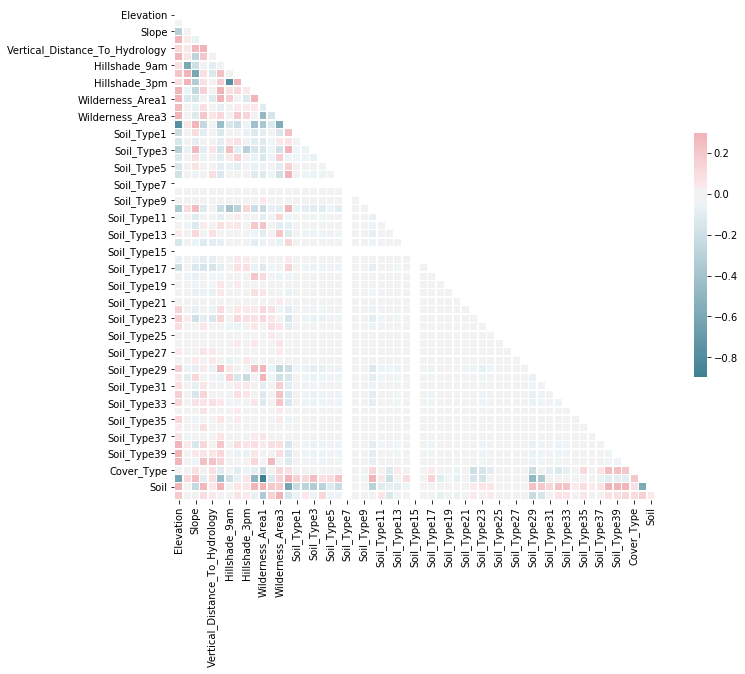

In [40]:
import numpy as np
corr = df3.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [41]:
df4 = pd.pivot_table(df3[['Soil','Wild','Cover_Type']], index='Cover_Type').reset_index()
df4 = df4.pivot('Soil', 'Wild', 'Cover_Type')
df4.fillna(0)

Wild,1.9287037037,1.93287037037,2.20740740741,2.3787037037,3.55462962963,3.60046296296,4.0
Soil,,,,,,,
6.375926,0.0,0.0,0.0,0.0,0.0,3.0,0.0
7.065278,0.0,0.0,0.0,0.0,0.0,0.0,4.0
10.150463,0.0,0.0,0.0,0.0,6.0,0.0,0.0
21.686574,0.0,0.0,5.0,0.0,0.0,0.0,0.0
24.589815,2.0,0.0,0.0,0.0,0.0,0.0,0.0
27.659259,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36.672222,0.0,0.0,0.0,7.0,0.0,0.0,0.0


In [42]:
df = pd.concat([df3.iloc[:,:10], df3.iloc[:, -4: ]], axis=1)

In [43]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wild,Soil,Id
Id,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,5,1,29,0
2,2590,56,2,212,-6,390,220,235,151,6225,5,1,29,1
3,2804,139,9,268,65,3180,234,238,135,6121,2,1,12,2
4,2785,155,18,242,118,3090,238,238,122,6211,2,1,30,3
5,2595,45,2,153,-1,391,220,234,150,6172,5,1,29,4


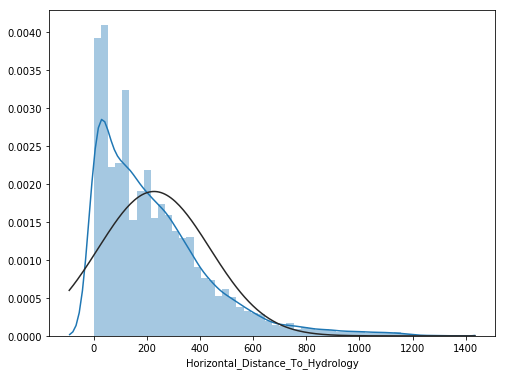

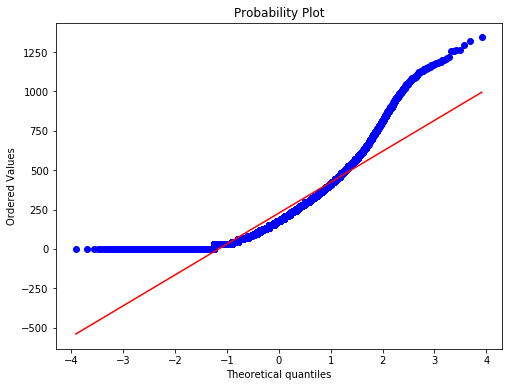

In [44]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(df['Horizontal_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df['Horizontal_Distance_To_Hydrology'], plot=plt)

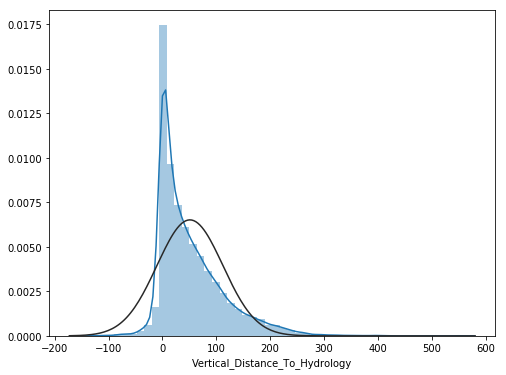

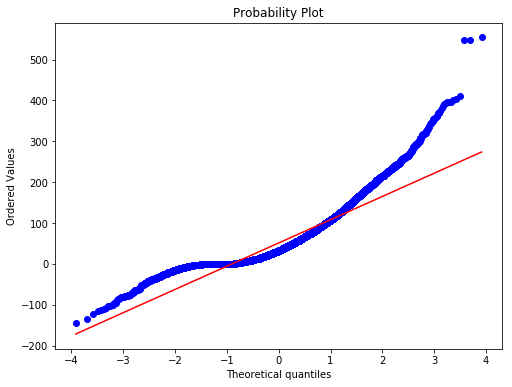

In [45]:
plt.figure(figsize=(8,6))
sns.distplot(df['Vertical_Distance_To_Hydrology'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df['Vertical_Distance_To_Hydrology'], plot=plt)

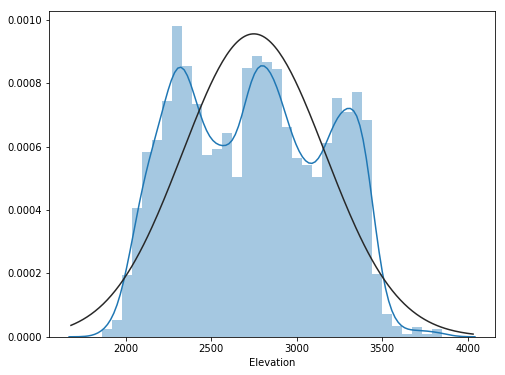

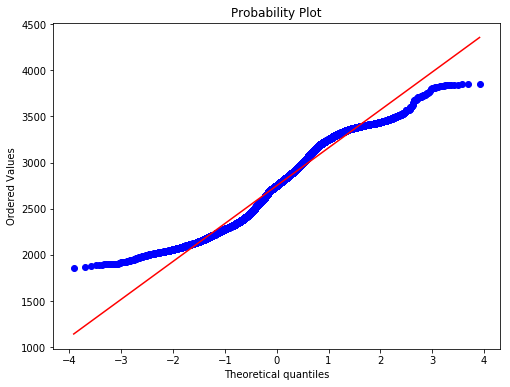

In [46]:
plt.figure(figsize=(8,6))
sns.distplot(df['Elevation'], fit = stats.norm)
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df['Elevation'], plot=plt)

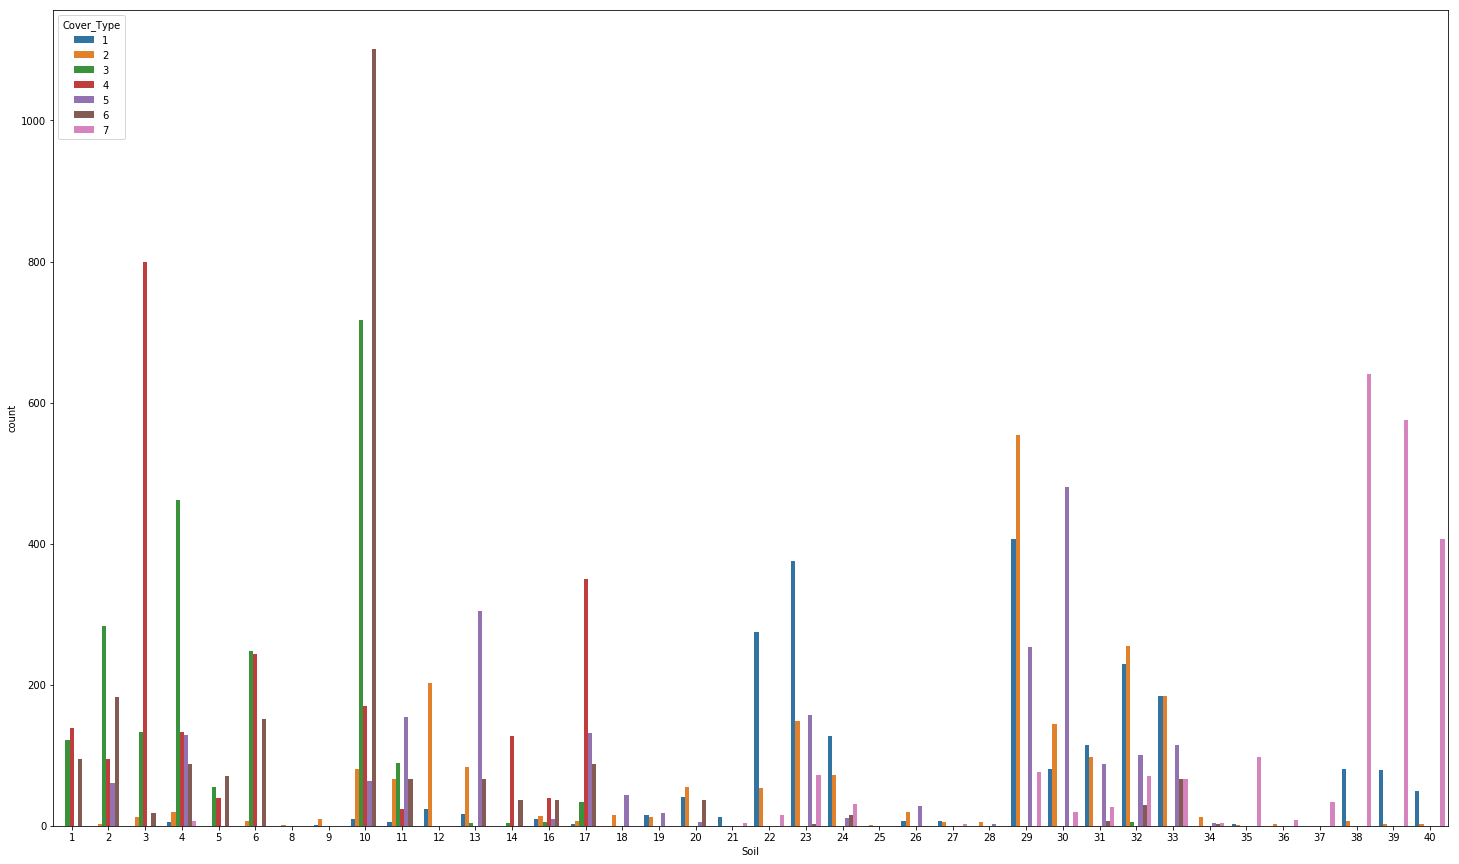

In [47]:
plt.rc("figure", figsize=(25, 15))
sns.countplot(x="Soil", hue="Cover_Type", data=df)
plt.show()

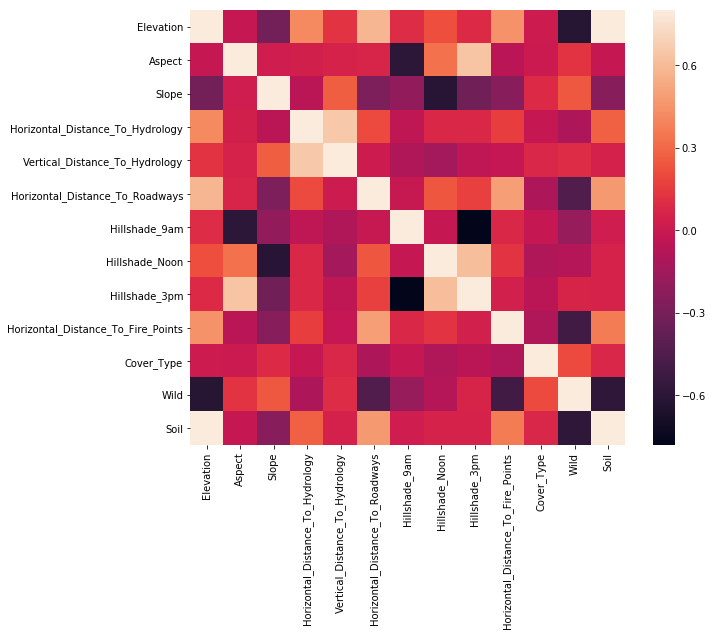

In [48]:
corrmat = df.iloc[:,:-1].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corrmat,vmax=0.8,square=True);

In [49]:
y = df['Cover_Type']
del df['Cover_Type']
X = df
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wild,Soil,Id
Id,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,29,0
2,2590,56,2,212,-6,390,220,235,151,6225,1,29,1
3,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
4,2785,155,18,242,118,3090,238,238,122,6211,1,30,3
5,2595,45,2,153,-1,391,220,234,150,6172,1,29,4


In [50]:
df = df.iloc[:,:-3]
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Id,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279
2,2590,56,2,212,-6,390,220,235,151,6225
3,2804,139,9,268,65,3180,234,238,135,6121
4,2785,155,18,242,118,3090,238,238,122,6211
5,2595,45,2,153,-1,391,220,234,150,6172


In [51]:
from sklearn.preprocessing import StandardScaler
for i in df.columns:
    df[i] = StandardScaler().fit_transform(df[i])
df.head()

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Id,,,,,,,,,,
1,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805
2,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710
3,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156
4,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981
5,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

In [54]:
train_df = pd.read_csv('data/train.csv', sep=',', header=0)
train_df.dropna()

train_df = train_df.drop('Id', axis=1)    
y_data = train_df['Cover_Type'].values
train_df = train_df.drop('Cover_Type', axis=1)


idx = 10 
cols = list(train_df.columns.values)[:idx]
train_df[cols] = StandardScaler().fit_transform(train_df[cols])

X_data = train_df.values            
X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=123)

svm_parameters = [{'kernel': ['rbf'], 'C': [1,10,100,1000]}]                
clf = GridSearchCV(svm.SVC(), svm_parameters, cv=3, verbose=2)
clf.fit(X_train, y_train)    
clf.best_params_
clf.grid_scores_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] kernel=rbf, C=1 .................................................
[CV] ........................................ kernel=rbf, C=1 -   6.1s
[CV] kernel=rbf, C=1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[CV] ........................................ kernel=rbf, C=1 -   5.7s
[CV] kernel=rbf, C=1 .................................................
[CV] ........................................ kernel=rbf, C=1 -   5.9s
[CV] kernel=rbf, C=10 ................................................
[CV] ....................................... kernel=rbf, C=10 -   4.7s
[CV] kernel=rbf, C=10 ................................................
[CV] ....................................... kernel=rbf, C=10 -   4.4s
[CV] kernel=rbf, C=10 ................................................
[CV] ....................................... kernel=rbf, C=10 -   4.7s
[CV] kernel=rbf, C=100 ...............................................
[CV] ...................................... kernel=rbf, C=100 -   5.2s
[CV] kernel=rbf, C=100 ...............................................
[CV] ...................................... kernel=rbf, C=100 -   5.0s
[CV] kernel=rbf, C=100 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.2min finished


[mean: 0.71768, std: 0.00113, params: {'kernel': 'rbf', 'C': 1},
 mean: 0.75504, std: 0.00424, params: {'kernel': 'rbf', 'C': 10},
 mean: 0.78985, std: 0.00431, params: {'kernel': 'rbf', 'C': 100},
 mean: 0.81184, std: 0.00577, params: {'kernel': 'rbf', 'C': 1000}]

In [55]:
clf = svm.SVC(C=1000,kernel='rbf')
clf.fit(X_train,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
pred=clf.predict(X_test)
acc=clf.score(X_test,y_test)
print(acc)

0.83630952381


In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,class_weight='balanced',n_jobs=2,random_state=42)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
acc=rf.score(X_test,y_test)
print(acc)

0.868716931217


In [58]:
train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,...,0,0,0,0,0,0,0,0,0,0
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,...,0,0,0,0,0,0,0,0,0,0
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,...,0,0,0,0,0,0,0,0,0,0
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,...,0,0,0,0,0,0,0,0,0,0
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#predict test data    
test_df = pd.read_csv('data/test.csv')
test_idx = test_df['Id'].values 
test_df = test_df.drop('Id', axis=1)
test_df[cols] = StandardScaler().fit_transform(test_df[cols])

y_pred = clf.predict(test_df)
y_pred

array([2, 2, 2, ..., 6, 6, 6])

In [60]:
solution = pd.DataFrame({'Id':test_idx, 'Cover_Type':y_pred}, columns = ['Id','Cover_Type'])
solution.to_csv('submission.csv', index=False)

## LDA (Linear algo)


In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
algo = "LDA"
model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)
print(acc)

0.662367724868


## LR (Linear algo)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)
print(acc)

0.69246031746


## KNN (Non-linear algo)


In [66]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)
print(acc)

0.792328042328


## Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)
print(acc)

0.487764550265


## CART (Non-linear algo)

In [69]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)
print(acc)

0.78373015873


## SVM (Non-linear algo)

In [70]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)
print(acc)

0.75


## Bagged Decision Trees (Bagging)

In [74]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=13)
model = BaggingClassifier(n_jobs=-1,base_estimator=base_estimator)

model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)
print(acc)

0.824074074074


## Random Forest (Bagging)

In [76]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)
print(acc)

0.834325396825


## Extra Trees (Bagging)

In [77]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)
print(acc)

0.845238095238


## AdaBoost (Boosting)

In [78]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)
print(acc)

0.459325396825


## Gradient Boosting (Boosting)

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)
print(acc)

0.806878306878


## Voting Classifier (Voting)


In [ ]:
from sklearn.ensemble import VotingClassifier
import random

seed = random.seed()

estimators = []
model1 = ExtraTreesClassifier(n_jobs=-1,n_estimators=100, random_state=seed)
estimators.append(('et', model1))
model2 = RandomForestClassifier(n_jobs=-1,n_estimators=100, random_state=seed)
estimators.append(('rf', model2))
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(random_state=seed,max_depth=13)
model3 = BaggingClassifier(n_jobs=-1,base_estimator=base_estimator, n_estimators=100, random_state=seed)
estimators.append(('bag', model3))

model = VotingClassifier(estimators=estimators, n_jobs=-1)

model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)

print(acc)

y_pred = model.predict(test_df)

solution = pd.DataFrame({'Id':test_idx, 'Cover_Type':y_pred}, columns = ['Id','Cover_Type'])
solution.to_csv('submission2.csv', index=False)


0.871693121693


## XGBoost

In [92]:
from xgboost import XGBClassifier
model = XGBClassifier(subsample=0.25)
model.fit(X_train,y_train)
pred=model.predict(X_test)
acc=model.score(X_test,y_test)
print(acc)

0.784060846561
